## Capstone Pokémon Project: Phase 1


## Loading Data

1. Load copy of the complete Pokémon dataset from Kaggle
2. Explore the data
3. Figure out the goal of data mining this dataset
4. Clean the data


In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

# load the copy of the kaggle dataset
df = pd.read_csv("./pokemon.csv")

# explore some of the basics of the data
# pandas' shape will give us an overview of how many rows and columns exist
df.shape



(801, 41)

In [223]:
# look a little deeper by checking the first 5 rows of the data
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [224]:
# getting some descriptive statistics on the data 
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [225]:
# I want to predict which pokemon would do well 
# against another randomly picked pokemon in a battle, but let's explore this data a little more
df["classfication"].describe()

count                801
unique               588
top       Dragon Pokémon
freq                   8
Name: classfication, dtype: object

## Data Exploration:

In [226]:
# are there any highly correlated features? 

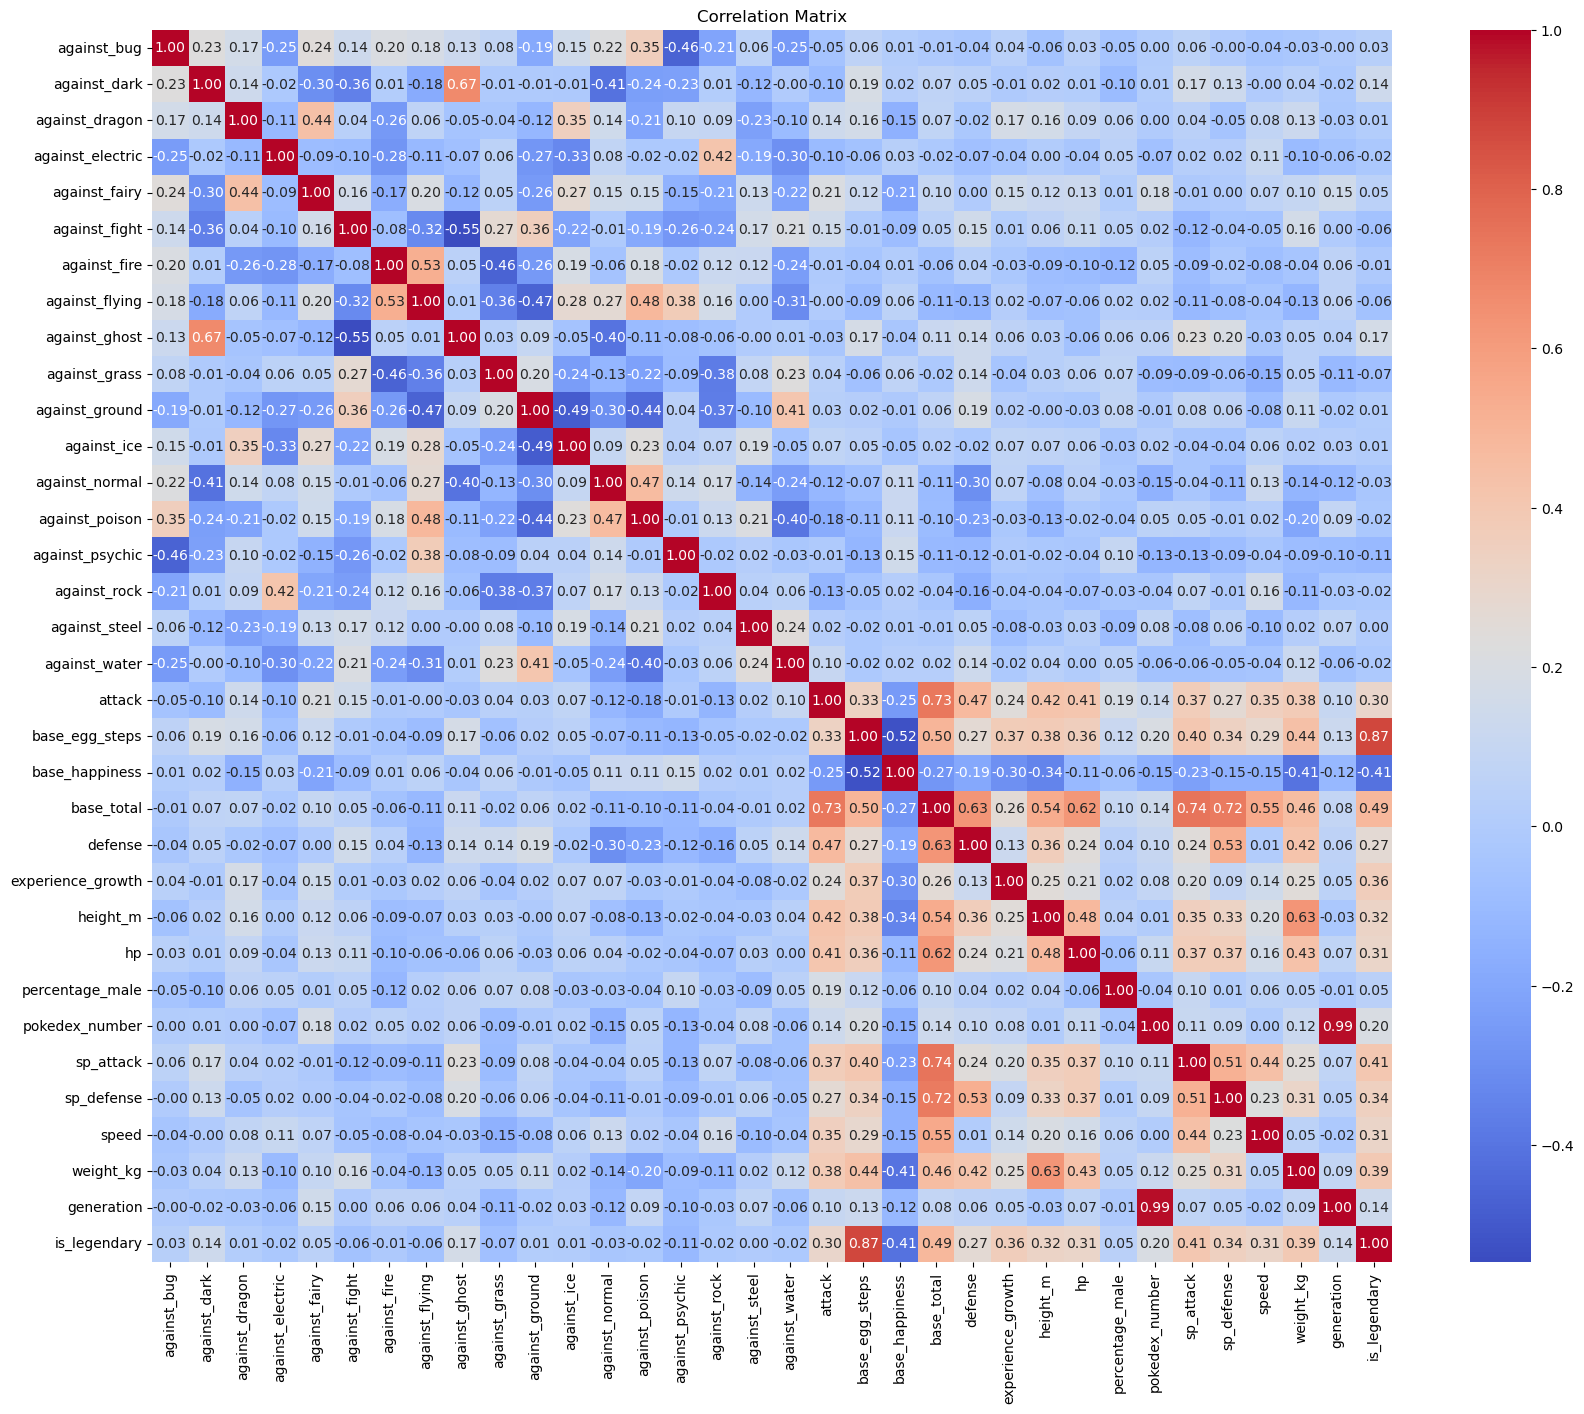

In [227]:
# we need to look at numerical data only for a correlation matrix
# forgot to clean that up before so handling it now:
num_data = df.select_dtypes(include=['int64', 'float64'])

# correlation matrix for the pokemon data
correlation_matrix = num_data.corr()

# plotting the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Exploratory Data Analysis

 The correlation matrix shows us a couple of different things:
 1. We can see that the column 'is_legendary' and 'base_egg_steps' are highly correlated with a 0.87. This makes sense since base_egg_steps represents how many steps the trainer character has to take in order to incubate the pokemon egg they're carrying. Legendary pokémon eggs would take a much higher number of steps taken by the trainer character before they are ready to hatch.
 2. 'generation' and 'pokedex_number' are also highly correlated with 0.99; the higher the generation, the higher the pokédex number.
 3. 'defense' and 'attack' are similarly correlated.
 
 We can remove generation from the data without impacting what we're trying to solve, and base_egg_steps as well

In [228]:
# do we have any missing values? if so, where? maybe looking at the mean of null values can help paint a picture

In [229]:
missing_values = df.isnull().mean() * 100
missing_columns = missing_values[missing_values > 0]
print("Missing Values:\n", missing_columns)

Missing Values:
 height_m            2.496879
percentage_male    12.234707
type2              47.940075
weight_kg           2.496879
dtype: float64


In [230]:
# will those missing values affect training the data? 
# i think we'll be looking at type 1+ type 2 combinations, so that type 2 missing data may affect the model

In [231]:
df['type2'].fillna('None', inplace=True)

In [232]:
# can we look at the data as histograms to see a little more of how the data is distributed?

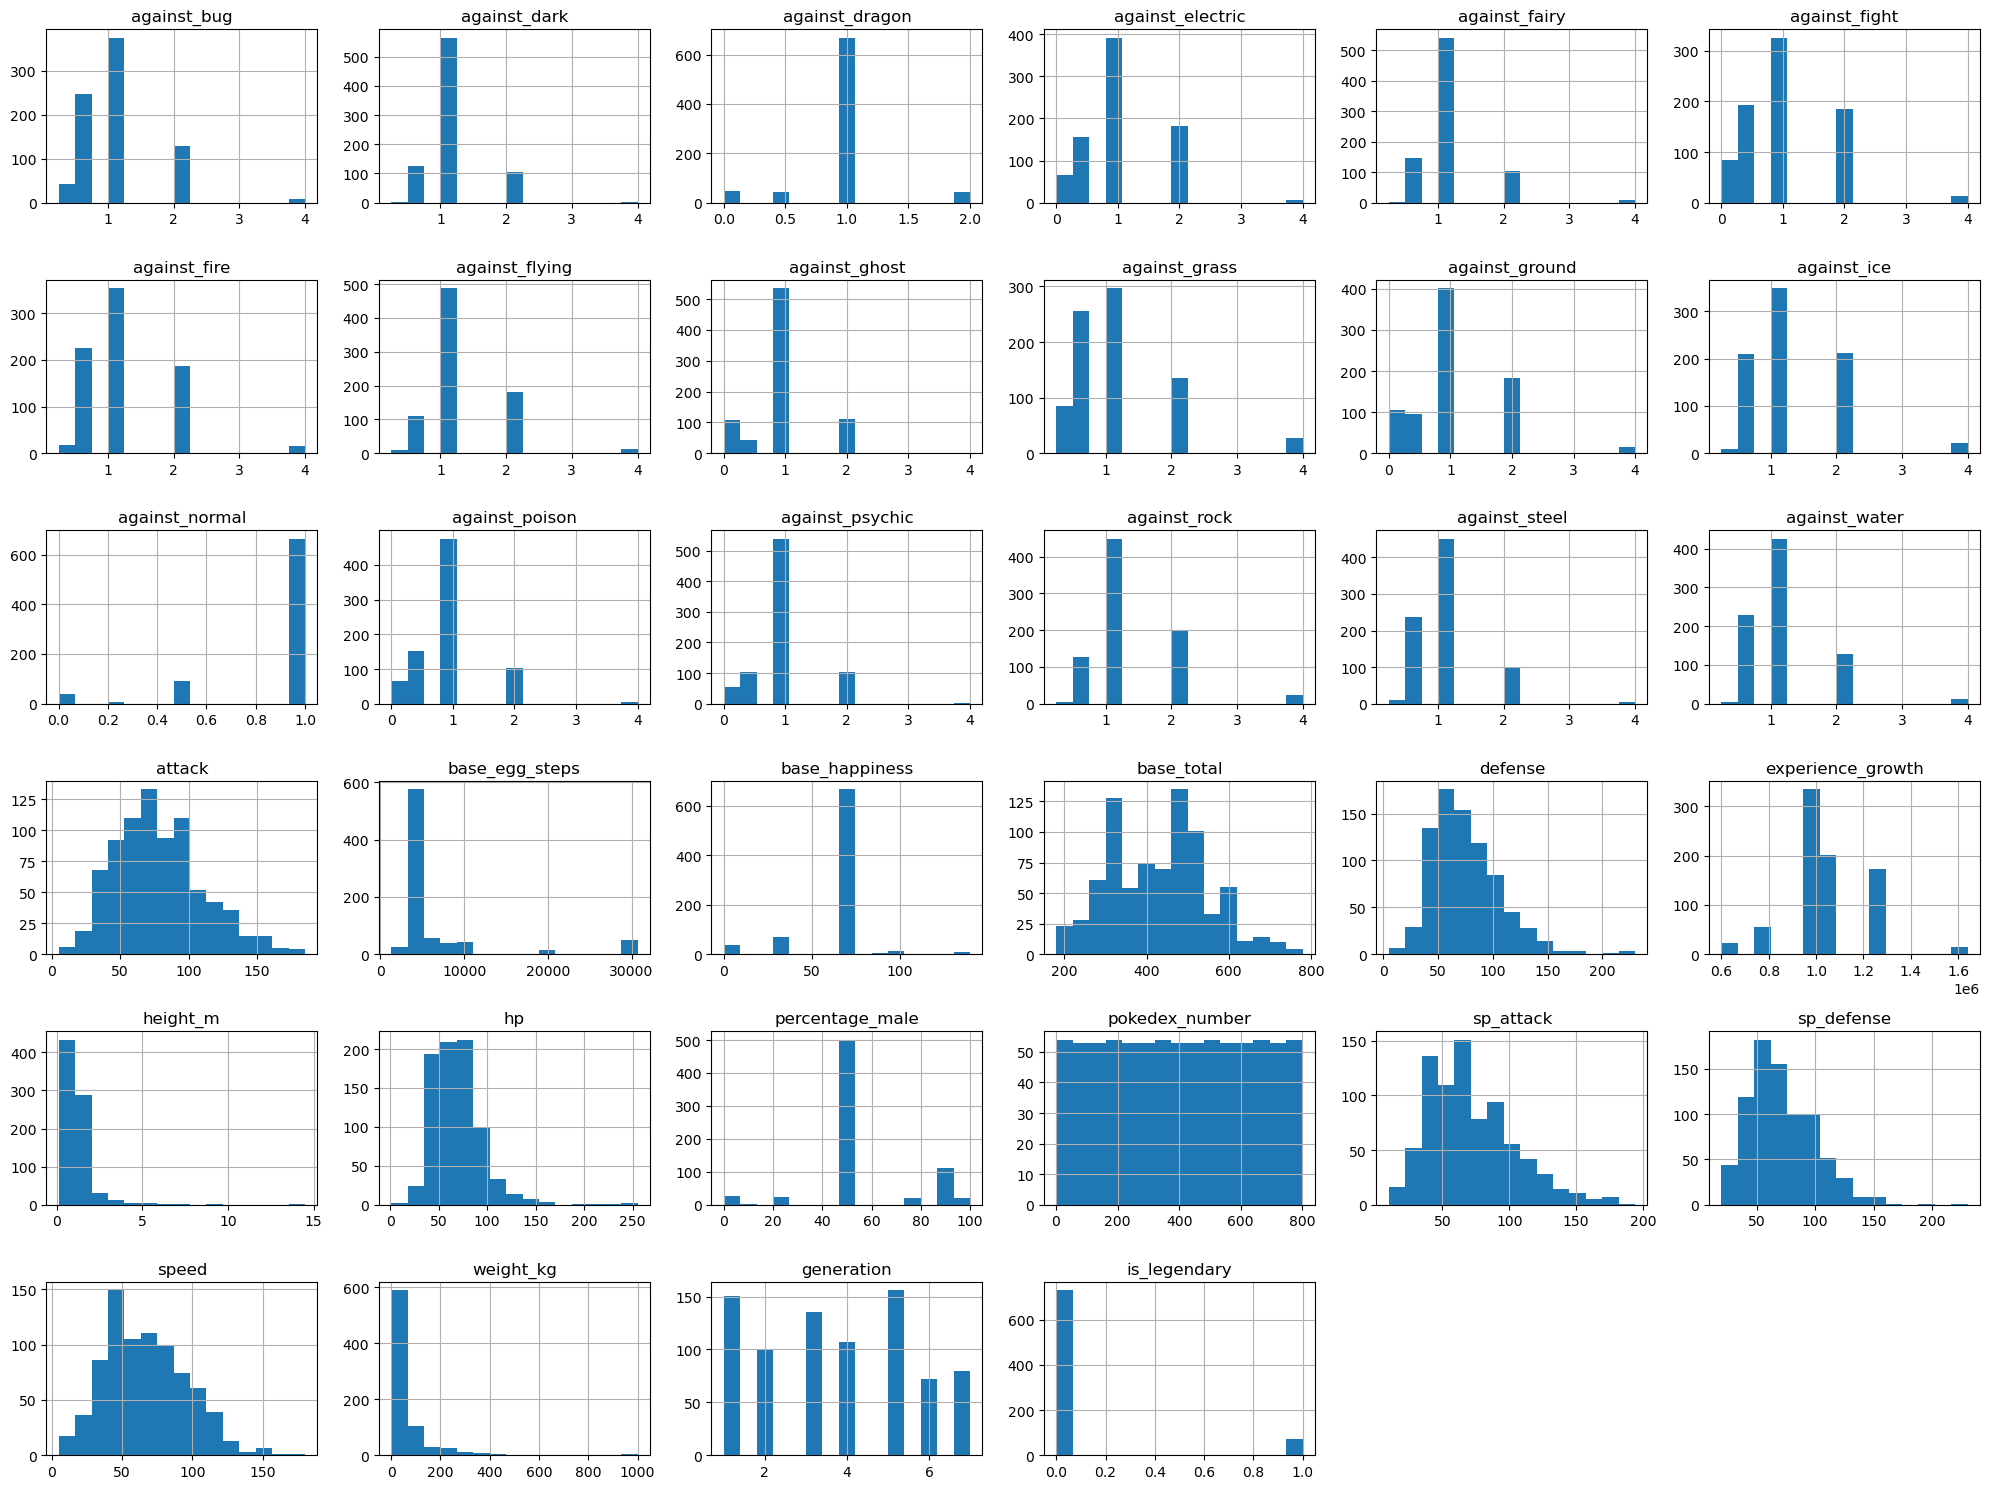

In [233]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns # remember to only grab numerical values of features
df[num_features].hist(bins=15, figsize=(20, 15), layout=(6, 6))
plt.tight_layout()
plt.show()

the mini histograms can show us how data is distributed, any outliers, and any columns that may need to be normalized

In [250]:
# i want to see how type1+type2 combinations fare:

In [251]:
df['type_combination'] = df.apply(lambda row: row['type1'] if row['type2'] == '' else f"{row['type1']} + {row['type2']}", axis=1)

from sklearn.preprocessing import LabelEncoder

#encode type combination for later use in comparison:
label_encoder = LabelEncoder()
df['type_combination_encoded'] = label_encoder.fit_transform(df['type_combination'])

In [252]:
# cleaning up and normalizing this data:

In [254]:
df_encoded = pd.get_dummies(df, columns=['type_combination'])
print(df_encoded.head())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  type_combination_water + fighting  \
0             2.0            1.0  ...                     

In [255]:
# we can use min-max scaling to transform the data to a range (usually between 0 and 1)
# and we can do this for numerical data
from sklearn.preprocessing import MinMaxScaler

num_features = ['height_m', 'weight_kg', 'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
scaler = MinMaxScaler()

df[num_features] = scaler.fit_transform(df[num_features])

# lets print this to see what some of the data looks like:

print(df[num_features].head())

   height_m  weight_kg  base_egg_steps        hp    attack   defense  \
0  0.041667   0.006801        0.130435  0.173228  0.244444  0.195556   
1  0.062500   0.012903        0.130435  0.232283  0.316667  0.257778   
2  0.131944   0.099920        0.130435  0.311024  0.527778  0.524444   
3  0.034722   0.008402        0.130435  0.149606  0.261111  0.168889   
4  0.069444   0.018904        0.130435  0.224409  0.327778  0.235556   

   sp_attack  sp_defense     speed  
0   0.298913    0.214286  0.228571  
1   0.380435    0.285714  0.314286  
2   0.608696    0.476190  0.428571  
3   0.271739    0.142857  0.342857  
4   0.380435    0.214286  0.428571  


In [256]:
# now the data is more consistent and we can interpret it a little better

In [257]:
# let's train a model or two and see what we get after we normalize some of the data:

In [258]:
# split our data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# handling NaN or empty values so we can run the models because I didn't do these earlier...
df['height_m'].fillna(df['height_m'].median(), inplace=True)
df['percentage_male'].fillna(df['percentage_male'].median(), inplace=True)
df['weight_kg'].fillna(df['weight_kg'].median(), inplace=True)
# need to separate additional features: 
X = df_encoded.select_dtypes(include=[np.number])
y = df_encoded['is_legendary']
# our new X with no NaN:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)
X = X.values


train_sizes = [0.1, 0.2, 0.3]

# and maybe test a few different models to see what works best? 
# good 'ol KNN first:

from sklearn.neighbors import KNeighborsClassifier

def evaluate_model(X, y, train_size):
    # our dataset isn't huge, so let's look at a training sets of 10%, 20%, and 30%:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# let's instantiate a results array and append the training dataset size, accuracy, and the classification report:
results = []
for train_size in train_sizes:
    accuracy, report = evaluate_model(X, y, train_size)
    results.append((train_size, accuracy, report))
    
results_df = pd.DataFrame(results, columns=['Train Size', 'Accuracy', 'Report'])
print(results_df)

# KNN worked pretty well! Let's test a different type of model and compare accuracy


   Train Size  Accuracy                                             Report
0         0.1  0.927878                precision    recall  f1-score   ...
1         0.2  0.936037                precision    recall  f1-score   ...
2         0.3  0.937611                precision    recall  f1-score   ...


In [259]:
# Trying this out with random forest:
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(X, y, train_size):
    # our dataset isn't huge, so let's look at a training sets of 10%, 20%, and 30%:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# let's instantiate a results array and append the training dataset size, accuracy, and the classification report:
results = []
for train_size in train_sizes:
    accuracy, report = evaluate_model(X, y, train_size)
    results.append((train_size, accuracy, report))
    
results_df = pd.DataFrame(results, columns=['Train Size', 'Accuracy', 'Report'])
print(results_df)

#Random Forest did a little better, so let's stick with it...

   Train Size  Accuracy                                             Report
0         0.1  0.991678                precision    recall  f1-score   ...
1         0.2  0.995320                precision    recall  f1-score   ...
2         0.3  0.998217                precision    recall  f1-score   ...


The whole point of this is to figure out which of trainer # 1's 6 pokémon should win against trainer # 2's set. For that, we need to look at their type1+ type2 combinations, their abilities, and how they perform against other pokémon.

I want to use what we learned earlier and apply it to this battle concept.

In [260]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [261]:
# more model time, this time to predict winner:

In [262]:
# what do we need to look at? all of the 'against_' type columns:
against_columns = [col for col in df.columns if col.startswith('against_')]
# we need an array to store our different battle data:
battle_data = []

# sample size needs adjusting and remember number of samples can't be larger than dataset
num_samples = min(250, len(df))
sampled_df = df.sample(n=num_samples, random_state=42)

for i, row in sampled_df.iterrows():
    for j, opponent_row in sampled_df.iterrows():
        if i != j:
            effectiveness = 1.0
            for col in against_columns:
                col_name = col.replace('against_', '')
                if col_name in opponent_row['type_combination']:
                    effectiveness *= row[col]
            opponent_effectiveness = 1.0
            for col in against_columns:
                col_name = col.replace('against_', '')
                if col_name in row['type_combination']:
                    opponent_effectiveness *= opponent_row[col]
            battle_data.append([
                row['name'], opponent_row['name'],
                row['type_combination_encoded'], opponent_row['type_combination_encoded'],
                effectiveness, opponent_effectiveness,
                row['attack'], opponent_row['attack'],
                row['defense'], opponent_row['defense'],
                row['sp_attack'], opponent_row['sp_attack'],
                row['sp_defense'], opponent_row['sp_defense'],
                row['speed'], opponent_row['speed'],
                row['hp'], opponent_row['hp'],
                row['generation'], opponent_row['generation'],
                row['is_legendary'], opponent_row['is_legendary'],
                1 if effectiveness > opponent_effectiveness else 0  # 1 if Pokémon i wins, 0 otherwise
            ])


In [263]:
# need to create another dataframe for battles:

battle_df = pd.DataFrame(battle_data, columns=[
    'pokemon', 'opponent', 'pokemon_type', 'opponent_type',
    'effectiveness', 'opponent_effectiveness',
    'pokemon_attack', 'opponent_attack',
    'pokemon_defense', 'opponent_defense',
    'pokemon_sp_attack', 'opponent_sp_attack',
    'pokemon_sp_defense', 'opponent_sp_defense',
    'pokemon_speed', 'opponent_speed',
    'pokemon_hp', 'opponent_hp',
    'pokemon_generation', 'opponent_generation',
    'pokemon_is_legendary', 'opponent_is_legendary',
    'win'
])

# and calculate the differences in pokémon characteristics
battle_df['attack_diff'] = battle_df['pokemon_attack'] - battle_df['opponent_attack']
battle_df['defense_diff'] = battle_df['pokemon_defense'] - battle_df['opponent_defense']
battle_df['sp_attack_diff'] = battle_df['pokemon_sp_attack'] - battle_df['opponent_sp_attack']
battle_df['sp_defense_diff'] = battle_df['pokemon_sp_defense'] - battle_df['opponent_sp_defense']
battle_df['speed_diff'] = battle_df['pokemon_speed'] - battle_df['opponent_speed']
battle_df['hp_diff'] = battle_df['pokemon_hp'] - battle_df['opponent_hp']
battle_df['generation_diff'] = battle_df['pokemon_generation'] - battle_df['opponent_generation']
battle_df['is_legendary_diff'] = battle_df['pokemon_is_legendary'].astype(int) ^ battle_df['opponent_is_legendary'].astype(int)

# defining the features and target for the model:
features = [
    'pokemon_type', 'opponent_type', 'effectiveness', 'opponent_effectiveness',
    'attack_diff', 'defense_diff', 'sp_attack_diff', 'sp_defense_diff',
    'speed_diff', 'hp_diff', 'generation_diff', 'is_legendary_diff'
]
X = battle_df[features]
y = battle_df['win']


In [264]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=30)

# training time! ...after trying a few different approaches and landing on random forest:
model = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=30, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, n_jobs=-1, random_state=30)

In [265]:
# evaluating the model: 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.974622550594282
Precision: 0.9435569755058573
Recall: 0.9714912280701754
F1-Score: 0.9573203673689897
Confusion Matrix:
 [[2148   53]
 [  26  886]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2201
           1       0.94      0.97      0.96       912

    accuracy                           0.97      3113
   macro avg       0.97      0.97      0.97      3113
weighted avg       0.98      0.97      0.97      3113



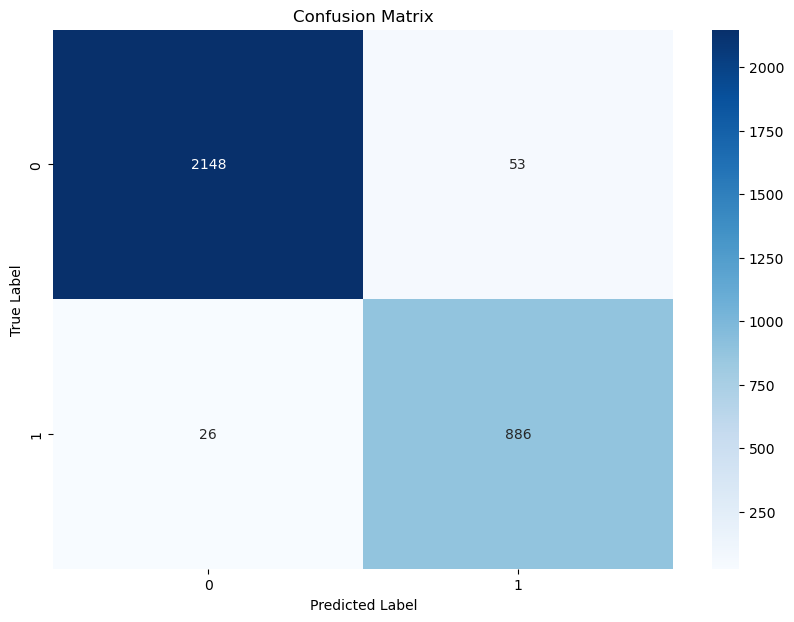

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

In [266]:
# and let's look at the confusion matrix:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(df)

In [267]:
# that confusion matrix is pretty great!
# and at the feature importances:
importance = model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature  Importance
2            effectiveness    0.612776
3   opponent_effectiveness    0.382665
1            opponent_type    0.002631
5             defense_diff    0.000703
6           sp_attack_diff    0.000436
11       is_legendary_diff    0.000433
9                  hp_diff    0.000177
0             pokemon_type    0.000145
7          sp_defense_diff    0.000034
4              attack_diff    0.000000
8               speed_diff    0.000000
10         generation_diff    0.000000


### using the feature importance values, we can probably predict which pokémon will do pretty well against another in 
### future iterations and with additional generations of Pokémon

In [268]:
#Let's look at some cute visuals of the type1+ type2 combination data

# bar chart of pokémon type combinations 
type_counts = df['type_combination'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
bar_chart = px.bar(type_counts, x='Type', y='Count', title='Distribution of Pokémon Type Combinations')
bar_chart.show()

# scatter plot of pokémon attack vs. defense
scatter_plot = px.scatter(df, x='attack', y='defense', color='type_combination', title='Attack vs. Defense')
scatter_plot.show()


In [269]:
# arrays for the trainer and opponent pokémon
trainer_pokemon = []
opponent_pokemon = []

import random

# method to generate random pokémon for our trainer and opponent:
def generate_random_pokemon(df, trainer_count=6, opponent_count=6):
    global trainer_pokemon, opponent_pokemon
    trainer_pokemon = random.sample(list(df['name']), trainer_count)
    opponent_pokemon = random.sample(list(df['name']), opponent_count)
    return trainer_pokemon, opponent_pokemon

def get_pokemon_row(pokemon_name):
    return df[df['name'] == pokemon_name].iloc[0]

# time to calculate how effective each pokémon will be against another
def calculate_effectiveness(trainer_pokemon, opponent_pokemon):
    effectiveness = []
    for trainer in trainer_pokemon:
        trainer_row = get_pokemon_row(trainer)
        trainer_effectiveness = []
        for opponent in opponent_pokemon:
            opponent_row = get_pokemon_row(opponent)
            effectiveness_value = 1.0
            for col in df.columns:
                if col.startswith('against_') and col.replace('against_', '') in opponent_row['type_combination']:
                    effectiveness_value *= trainer_row[col]
            trainer_effectiveness.append((opponent, effectiveness_value))
        effectiveness.append((trainer, trainer_effectiveness))
    return effectiveness

# method to recommend pokémon based on opponent's group
def recommend_pokemon(trainer_pokemon, opponent_pokemon):
    recommendations = {}
    for opponent in opponent_pokemon:
        best_choice = None
        best_effectiveness = -1
        reason = ""
        for trainer in trainer_pokemon:
            winner = predict_winner(trainer, opponent)
            if winner == trainer:
                row1 = get_pokemon_row(trainer)
                row2 = get_pokemon_row(opponent)
                effectiveness = 1.0
                for col in against_columns:
                    col_name = col.replace('against_', '')
                    if col_name in row2['type_combination']:
                        effectiveness *= row1[col]
                if effectiveness > best_effectiveness:
                    best_choice = trainer
                    best_effectiveness = effectiveness
                    reason = f"Effectiveness score: {effectiveness}, Attack Diff: {row1['attack'] - row2['attack']}, Defense Diff: {row1['defense'] - row2['defense']}"
        recommendations[opponent] = (best_choice, reason)
    return recommendations

In [270]:
# let's predict the winner and see what happens with our 6 v 6 battles:
def predict_winner(pokemon1, pokemon2):
    row1 = get_pokemon_row(pokemon1)
    row2 = get_pokemon_row(pokemon2)
    
    effectiveness = 1.0
    opponent_effectiveness = 1.0
    for col in against_columns:
        col_name = col.replace('against_', '')
        if col_name in row2['type_combination']:
            effectiveness *= row1[col]
        if col_name in row1['type_combination']:
            opponent_effectiveness *= row2[col]
    
    attack_diff = row1['attack'] - row2['attack']
    defense_diff = row1['defense'] - row2['defense']
    sp_attack_diff = row1['sp_attack'] - row2['sp_attack']
    sp_defense_diff = row1['sp_defense'] - row2['sp_defense']
    speed_diff = row1['speed'] - row2['speed']
    hp_diff = row1['hp'] - row2['hp']
    generation_diff = row1['generation'] - row2['generation']
    is_legendary_diff = int(row1['is_legendary']) ^ int(row2['is_legendary'])
    
    features = {
        'pokemon_type': row1['type_combination_encoded'], 'opponent_type': row2['type_combination_encoded'],
        'effectiveness': effectiveness, 'opponent_effectiveness': opponent_effectiveness,
        'attack_diff': attack_diff, 'defense_diff': defense_diff, 'sp_attack_diff': sp_attack_diff, 'sp_defense_diff': sp_defense_diff,
        'speed_diff': speed_diff, 'hp_diff': hp_diff, 'generation_diff': generation_diff, 'is_legendary_diff': is_legendary_diff
    }
    
    features_df = pd.DataFrame([features])
    prediction = model.predict(features_df)
    return pokemon1 if prediction[0] == 1 else pokemon2

In [271]:
# now to display this all to the user: 
from ipywidgets import Button, VBox, HBox, Output
from IPython.display import display

# we are displaying some graphics and interactive recommendations for our trainer:
recommendation_output_area = Output()
pokemon_output_area = Output()

# this method will call the generate random pokémon method and display that to our user
def display_random_pokemon():
    trainer_pokemon, opponent_pokemon = generate_random_pokemon(df)
    with pokemon_output_area:
        pokemon_output_area.clear_output()
        print("\nTrainer Pokémon:")
        for pokemon in trainer_pokemon:
            print(pokemon)
        print("\nOpponent Pokémon:")
        for pokemon in opponent_pokemon:
            print(pokemon)

# the same with this recommendation method
def suggest_recommendations():
    recommendations = recommend_pokemon(trainer_pokemon, opponent_pokemon)
    with recommendation_output_area:
        recommendation_output_area.clear_output(wait=True)
        print("Recommended Pokémon to use against each opponent:")
        for opponent, (recommendation, reason) in recommendations.items():
            print(f"Against {opponent}, use {recommendation} ({reason})")
    battle_results = predict_battle_winner(trainer_pokemon, opponent_pokemon)
    visualize_battle_results(battle_results)
    
# I want to see how our trainer would do against a random opponent:    
def predict_battle_winner(trainer_pokemon, opponent_pokemon):
    battle_results = []
    trainer_wins = 0
    opponent_wins = 0

    for opponent in opponent_pokemon:
        for trainer in trainer_pokemon:
            winner = predict_winner(trainer, opponent)
            if winner == trainer:
                trainer_wins += 1
                battle_results.append({
                    'Trainer Pokémon': trainer,
                    'Opponent Pokémon': opponent,
                    'Winner': 'Trainer'
                })
                break
            else:
                opponent_wins += 1
                battle_results.append({
                    'Trainer Pokémon': trainer,
                    'Opponent Pokémon': opponent,
                    'Winner': 'Opponent'
                })

    if trainer_wins >= 2:
        print(f"Based on #{trainer_wins} of wins, Trainer wins!")
    else:
        print(f"Based on #{opponent_wins} of wins, Opponent wins!")
    
    return battle_results

# and an easy to digest visual for our end user:
def visualize_battle_results(battle_results):
    df_battle_results = pd.DataFrame(battle_results)
    
    # need to count the number of wins for each side
    win_counts = df_battle_results['Winner'].value_counts().reset_index()
    win_counts.columns = ['Winner', 'Count']
    
    # let's show battle results in an easy bar chart
    bar_chart = px.bar(win_counts, x='Winner', y='Count', title='Battle Results', color='Winner', labels={'Count': 'Number of Wins'})
    
    # and for even more clarity, let's see a table of individual pokémon wins/losses
    table = go.Figure(data=[go.Table(
        header=dict(values=list(df_battle_results.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df_battle_results[col] for col in df_battle_results.columns],
                   fill_color='lavender',
                   align='left'))
    ])
    
    table.update_layout(title='Detailed Battle Results')
    
    # let's show our user both the bar chart and the table
    bar_chart.show()
    table.show()

In [272]:
# buttons for user to interact and generate random pokémon + recommendations:
button_random_pokemon = Button(description="Generate Random Pokémon")
button_pokemon_recommendations = Button(description="Pokémon Recommendations")


# button click events
def on_button_random_pokemon_clicked(b):
    with pokemon_output_area:
        display_random_pokemon()
    with recommendation_output_area:
        recommendation_output_area.clear_output()
    
def on_button_recommendations_clicked(b):
    with recommendation_output_area:
        recommendation_output_area.clear_output()
        suggest_recommendations()
              


button_random_pokemon.on_click(on_button_random_pokemon_clicked)
button_pokemon_recommendations.on_click(on_button_recommendations_clicked)
# display buttons/output area
display(VBox([button_random_pokemon, button_pokemon_recommendations, pokemon_output_area, recommendation_output_area]))